# Modern Computing Techniques MXN 442
## Assesment 2 
**Manuela Posso Baena**




- Logistic Regression
- Decision Trees
- Neural Network

In [1]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install imbalanced-learn


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
import numpy as np



# Customer Churn Prediction

## Introduction & Objective

**Customer churn** refers to the phenomenon where customers stop using a company’s products or services.  
For telecommunication companies, churn is a major business problem because acquiring new customers is far more expensive than retaining existing ones. A reliable churn prediction model allows businesses to identify at-risk customers early and take proactive retention measures, such as targeted offers or improved customer service. It is important: 
- Reducing churn increases profitability and customer lifetime value (CLV).
- Retaining customers costs significantly less than acquiring new ones.
- Understanding drivers of churn provides actionable insights for customer experience teams.

**Research context:** 
The baseline study Churn prediction in telecommunication industry using kernel Support Vector Machines (2022)  by *Nguyen, Tran & Dao (2022)* applied **Support Vector Machines (SVMs)** for churn prediction in the telecommunication industry. While effective, SVMs may struggle with scalability, interpretability, and handling imbalanced datasets.

**Objective of this project:**
To extend the baseline by implementing and comparing multiple machine learning models for churn prediction, including:
- Logistic Regression  
- Decision Tree (with hyperparameter tuning)  
- Random Forest  
- Gradient Boosting  
- Neural Network (MLP)  
- XGBoost (as an industry-standard extension suggested via GenAI)

Evaluation will be based on multiple metrics (Accuracy, Precision, Recall, F1, AUC), with particular emphasis on **Recall**, since missing churners (false negatives) is more costly than targeting some non-churners (false positives).


## Data Description & Summary

## Data Source

The dataset used in this project comes from **Kaggle**, specifically the https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/discussion?sort=undefined

It contains customer-level data from a telecommunication company, including demographic details, account information, subscribed services, and financial attributes.  

This dataset is widely used for churn prediction tasks in research and practice.  

The dataset used in this project combines customer records from the telecommunication industry, with approximately **3,300 customers** and **20 predictor variables**. The target variable is **Churn**, encoded as a binary label:

- **0 = No Churn** (customer stayed)  
- **1 = Churn** (customer left)  

### Key Features:
- **Demographic attributes**: Gender, SeniorCitizen, Partner, Dependents  
- **Account information**: Tenure, Contract type, PaperlessBilling, PaymentMethod  
- **Service-related features**: InternetService, OnlineSecurity, TechSupport, StreamingTV, StreamingMovies  
- **Financial attributes**: MonthlyCharges, TotalCharges  

### Target Distribution:
The dataset is imbalanced:
- ~85% of customers did not churn  
- ~15% of customers churned  

This imbalance means that **accuracy alone is not a sufficient metric** for evaluating models. Metrics such as **Recall, Precision, F1-score, and AUC** will be used to better assess predictive performance.



In [5]:
#Import Datasets 

df1 = pd.read_csv("data/churn-bigml-20.csv")
df2 = pd.read_csv("data/churn-bigml-80.csv")

print(df1.shape, df2.shape)


(667, 20) (2666, 20)


In [6]:
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)


In [7]:
df.to_csv("telecom_churn_final.csv", index=False)


In [8]:
print(df.shape)
print(df.info())

# Descriptive statistics
df.describe(include='all')


(3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


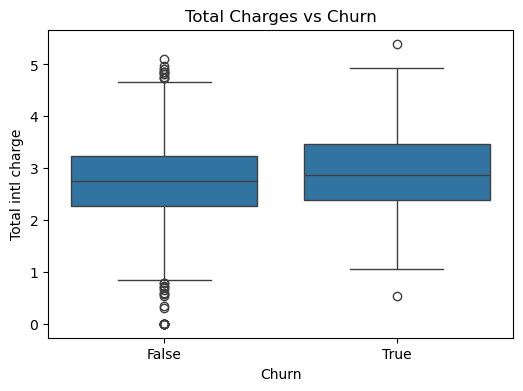

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="Total intl charge")
plt.title("Total Charges vs Churn")
plt.show() 


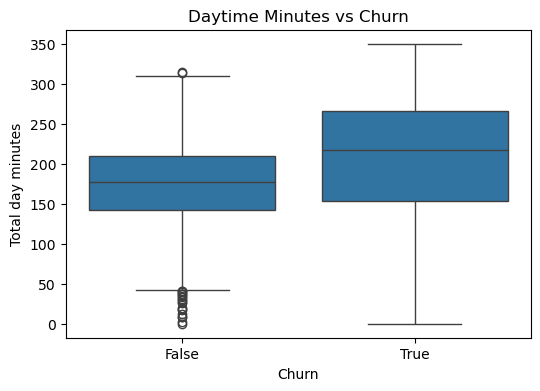

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Churn", y="Total day minutes")
plt.title("Daytime Minutes vs Churn")
plt.show()


In [11]:
print(df['Churn'].unique())
print(df['Churn'].value_counts())

[False  True]
Churn
False    2850
True      483
Name: count, dtype: int64


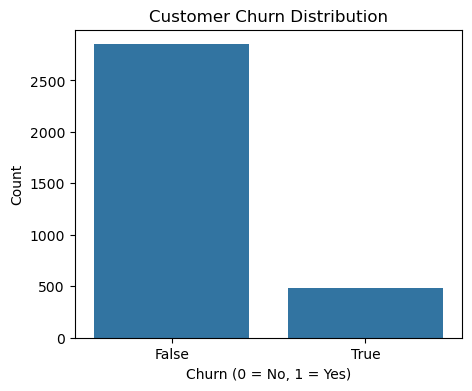

Churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(5,4))
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Percentage
print(df["Churn"].value_counts(normalize=True)*100)


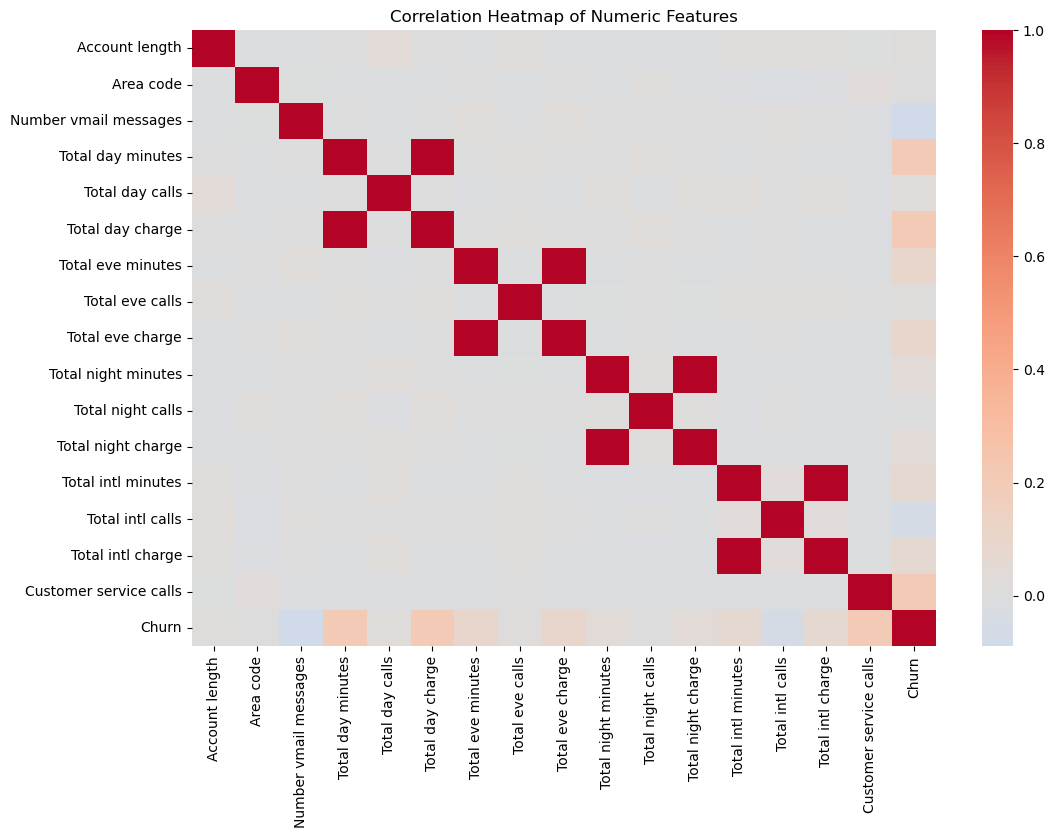

In [13]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# Pre process data

In [14]:
X = df.drop(['Churn'], axis=1)   # drop churn + ID
X = pd.get_dummies(X, drop_first=True)   # convert categorical → numeric

y = df['Churn'].astype(int)   # convert True/False to 1/0

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y   
)

print("Train set distribution:\n", y_train.value_counts())
print("Test set distribution:\n", y_test.value_counts())

Train set distribution:
 Churn
0    1995
1     338
Name: count, dtype: int64
Test set distribution:
 Churn
0    855
1    145
Name: count, dtype: int64


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression

The Logistic Regression model was implemented as a baseline classifier to predict customer churn. It estimates the probability of churn using the sigmoid function. The "balanced" class weight was applied to adjust for class imbalance and prevent bias toward the majority (non-churn) class.

###  Model Implementation

In [16]:
# Scale the data (important for convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize model
log_reg = LogisticRegression(
    solver='liblinear',         
    max_iter=10000,             
    class_weight='balanced',   
    random_state=42
)

# Fit model
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Cross-validation (5-fold) using recall
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='recall', n_jobs=-1)

print("Cross-validation Recall:", np.mean(cv_scores).round(4), "+/-", np.std(cv_scores).round(4))


Cross-validation Recall: 0.7103 +/- 0.0758


### Evaluation (Cross-validation results)

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import (
    make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
import numpy as np

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results = cross_validate(log_reg, X_train_scaled, y_train, cv=5, scoring=scoring, n_jobs=-1)

# Print results in a clean, formatted way
print("Cross-validation results (5-fold):")
for metric in scoring.keys():
    mean_score = np.mean(cv_results[f'test_{metric}'])
    std_score = np.std(cv_results[f'test_{metric}'])
    print(f"  {metric.capitalize():<10}: {mean_score:.3f} ± {std_score:.3f}")

Cross-validation results (5-fold):
  Accuracy  : 0.766 ± 0.013
  Precision : 0.348 ± 0.024
  Recall    : 0.710 ± 0.076
  F1        : 0.467 ± 0.038
  Roc_auc   : 0.743 ± 0.038


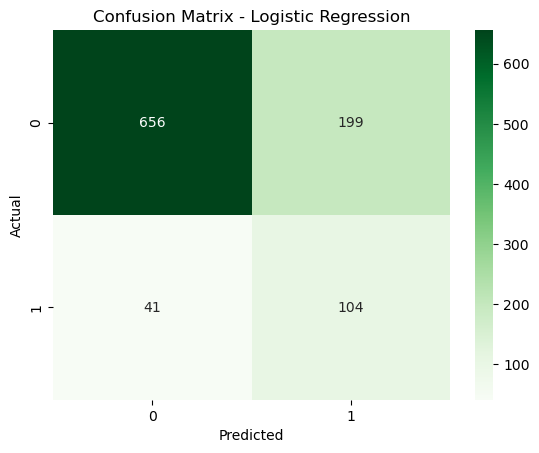

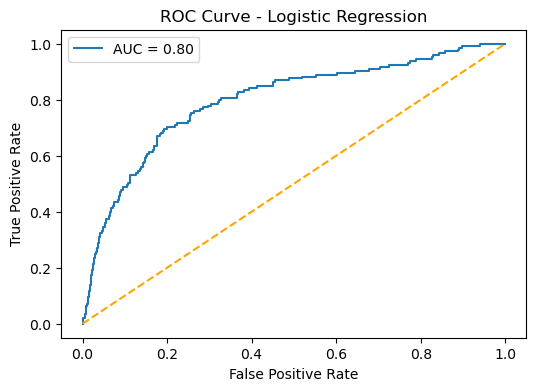

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], '--', color='orange')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


The Logistic Regression model demonstrated moderate recall (≈0.71), indicating a reasonable ability to identify customers likely to churn while maintaining interpretability and simplicity.
This baseline performance establishes a reference point for comparing more complex models such as Decision Trees, Random Forests, and Neural Networks.

----------------------------------------------------------------------------------------------

# 2. Decision Tree

## Model Implementation

The Decision Tree classifier was implemented to model nonlinear relationships and improve interpretability compared to Logistic Regression. The "balanced" class weight was used to mitigate class imbalance and ensure equal consideration of churn and non-churn customers.

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       855
           1       0.69      0.75      0.72       145

    accuracy                           0.91      1000
   macro avg       0.82      0.85      0.83      1000
weighted avg       0.92      0.91      0.92      1000

ROC-AUC: 0.8576245210727969


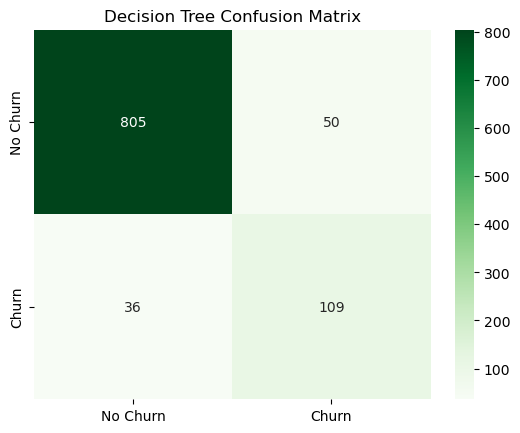

In [19]:
dt = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=5,      
    class_weight="balanced", 
    random_state=42
)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

# Evaluation
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens",
            xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"])
plt.title("Decision Tree Confusion Matrix")
plt.show()


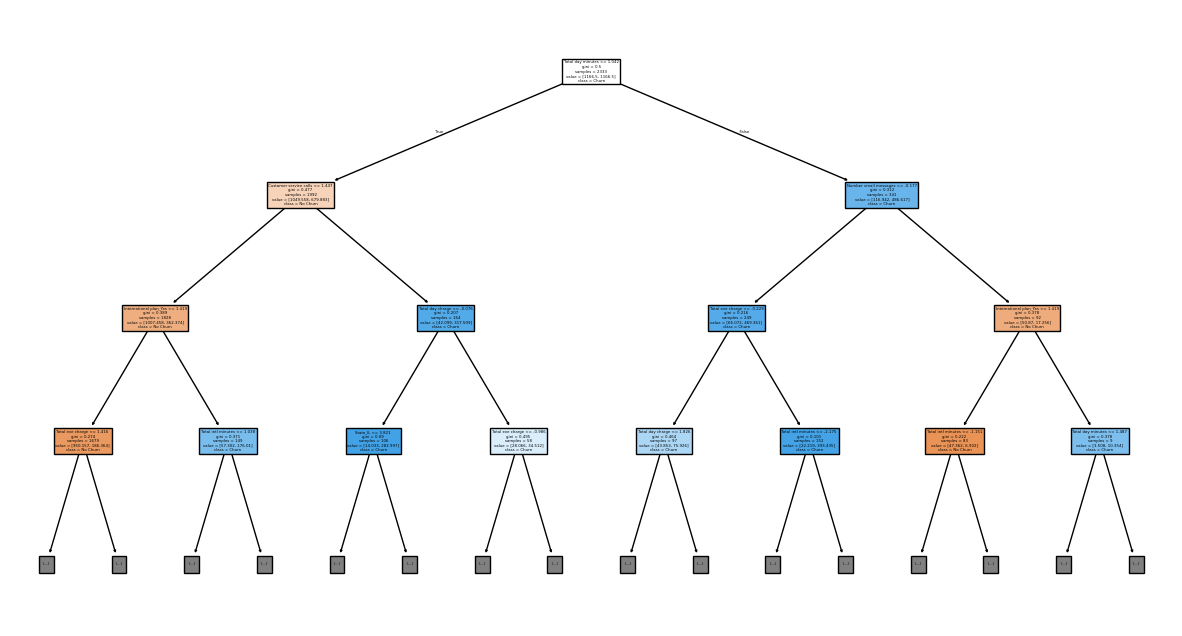

In [20]:
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=X.columns, class_names=["No Churn","Churn"], filled=True, max_depth=3)
plt.show()


## Optimisation

In [21]:
param_grid_dt = {
    "max_depth": [3, 5, 7, 9, 11, None],               
    "min_samples_split": [2, 5, 10, 15, 20],           
    "min_samples_leaf": [1, 2, 4, 6, 8, 10],          
    "criterion": ["gini", "entropy"]                   
}
dt = DecisionTreeClassifier(
    class_weight="balanced",
    random_state=42
)


grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring="recall",       # optimize for recall
    n_jobs=-1,
    error_score="raise"     
)

grid_dt.fit(X_train, y_train)


print("Best Parameters (Decision Tree):", grid_dt.best_params_)
print(f"Best Recall: {grid_dt.best_score_:.3f}")



Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 20}
Best Recall: 0.814


In [22]:
best_dt = grid_dt.best_estimator_

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results = cross_validate(best_dt, X, y, cv=5, scoring=scoring)

for metric in scoring.keys():
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.3f}")


Accuracy: 0.902
Precision: 0.632
Recall: 0.791
F1: 0.701
Roc_auc: 0.856


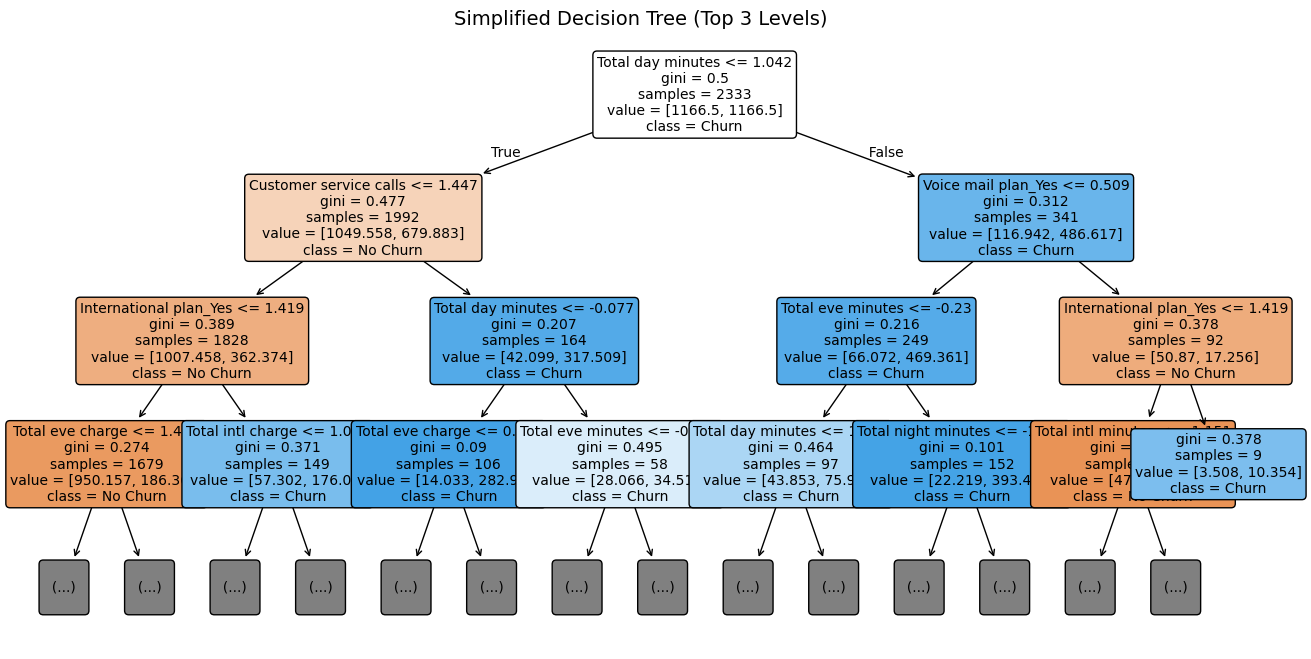

In [23]:
plt.figure(figsize=(16,8))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3   
)
plt.title("Simplified Decision Tree (Top 3 Levels)", fontsize=14)
plt.show()


# 3. Random Forest 

The Random Forest classifier was implemented to improve generalization and reduce overfitting compared to the single Decision Tree. By combining multiple trees through bagging (bootstrap aggregation), it aims to achieve higher predictive performance and stability.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],           
    'max_depth': [5, 10, 15, None],            
    'min_samples_split': [2, 5, 10],           
    'min_samples_leaf': [1, 2, 4],             
    'max_features': ['sqrt', 'log2'],          
    'criterion': ['gini', 'entropy']           
}


rf = RandomForestClassifier( class_weight='balanced',random_state=42,n_jobs=-1)


grid_rf = GridSearchCV(estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='recall',          
    n_jobs=-1,
    verbose=0
)

grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
print(f"Best Recall: {grid_rf.best_score_:.3f}")


Best Parameters (Random Forest): {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Recall: 0.769


In [25]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# --- Retrieve the best Random Forest model from GridSearchCV ---
best_rf = grid_rf.best_estimator_

# --- Define scoring metrics ---
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# --- Perform 5-fold cross-validation ---
cv_results_rf = cross_validate(best_rf, X, y, cv=5, scoring=scoring, n_jobs=-1)

# --- Print formatted results ---
print("=== Random Forest Cross-Validation Results (Optimized Model) ===")
for metric in scoring.keys():
    mean_score = np.mean(cv_results_rf[f'test_{metric}'])
    std_score = np.std(cv_results_rf[f'test_{metric}'])
    print(f"{metric.capitalize():<10}: {mean_score:.3f} ± {std_score:.3f}")


=== Random Forest Cross-Validation Results (Optimized Model) ===
Accuracy  : 0.904 ± 0.005
Precision : 0.634 ± 0.018
Recall    : 0.799 ± 0.020
F1        : 0.706 ± 0.012
Roc_auc   : 0.860 ± 0.009


------------------------------

# 4. Neural Network

The Neural Network (Multi-Layer Perceptron, MLP) was implemented to capture complex, nonlinear relationships among churn predictors that simpler models may overlook. Neural networks can approximate intricate decision boundaries, offering the potential to detect subtle churn patterns beyond those identifiable by tree-based or linear models.

In [26]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),    
    activation='relu',             
    solver='adam',                
    max_iter=500,                  
    random_state=42
)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

cv_results = cross_validate(mlp, X, y, cv=5, scoring=scoring)

print("=== Neural Network (MLP) Cross-Validation Results ===")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.4f}")
print(f"ROC-AUC Std: {cv_results['test_roc_auc'].std():.4f}")



=== Neural Network (MLP) Cross-Validation Results ===
Accuracy: 0.8758
Precision: 0.6999
Recall: 0.3064
F1: 0.4133
Roc_auc: 0.6393
ROC-AUC Std: 0.0209


In [27]:
# Define a deeper architecture
deep_mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32, 16),  
    activation='relu',
    solver='adam',
    alpha=0.0005,          
    learning_rate='adaptive',
    max_iter=1000,        
    random_state=42
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# 5-fold cross-validation
cv_results = cross_validate(deep_mlp, X, y, cv=5, scoring=scoring)

# Display results
print("=== Deep Neural Network (4-Layer MLP) Cross-Validation Results ===")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {cv_results['test_' + metric].mean():.4f}")
print(f"ROC-AUC Std: {cv_results['test_roc_auc'].std():.4f}")


=== Deep Neural Network (4-Layer MLP) Cross-Validation Results ===
Accuracy: 0.8860
Precision: 0.6596
Recall: 0.4679
F1: 0.5429
Roc_auc: 0.7124
ROC-AUC Std: 0.0146


---------------------------------

# Gen AI  Suggestions


This section documents how GenAI (ChatGPT 5.0) was used to support the model improvement process.
The main goal was to refine the existing models (Decision Tree and Random Forest) to improve recall, reduce overfitting, and increase generalization while keeping interpretability when possible.

## Forward Selection 

GenAI suggested using forward feature selection to identify the most informative predictors for churn.
This approach starts with no features and iteratively adds those that improve model performance until no significant gain is observed.

### Decision Tree

In [28]:
X = df.drop(['Churn'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # categorical → numeric

# dummy columns 
X = X.loc[:, ~X.columns.str.startswith('State_')]

# Target variable
y = df['Churn'].astype(int)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()


num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])


from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

sfs_forward = SequentialFeatureSelector(
    dt_model,
    n_features_to_select=10,
    direction='forward',
    scoring='recall',
    cv=5,
    n_jobs=-1
)

sfs_forward.fit(X_train_scaled, y_train)
forward_features = X_train_scaled.columns[sfs_forward.get_support()]
print("Forward Selection Features:\n", forward_features)


Forward Selection Features:
 Index(['Area code', 'Number vmail messages', 'Total day charge',
       'Total eve charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'International plan_Yes',
       'Voice mail plan_Yes'],
      dtype='object')


 Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
 Best CV Recall: 0.8344161545215101
 Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       855
           1       0.51      0.77      0.61       145

    accuracy                           0.86      1000
   macro avg       0.73      0.82      0.76      1000
weighted avg       0.89      0.86      0.87      1000

Confusion Matrix:
 [[746 109]
 [ 33 112]]
ROC-AUC (Test): 0.8628231498285944
Accuracy: 0.8628
Precision: 0.5168
Recall: 0.8344
F1: 0.6379
Roc_auc: 0.8957


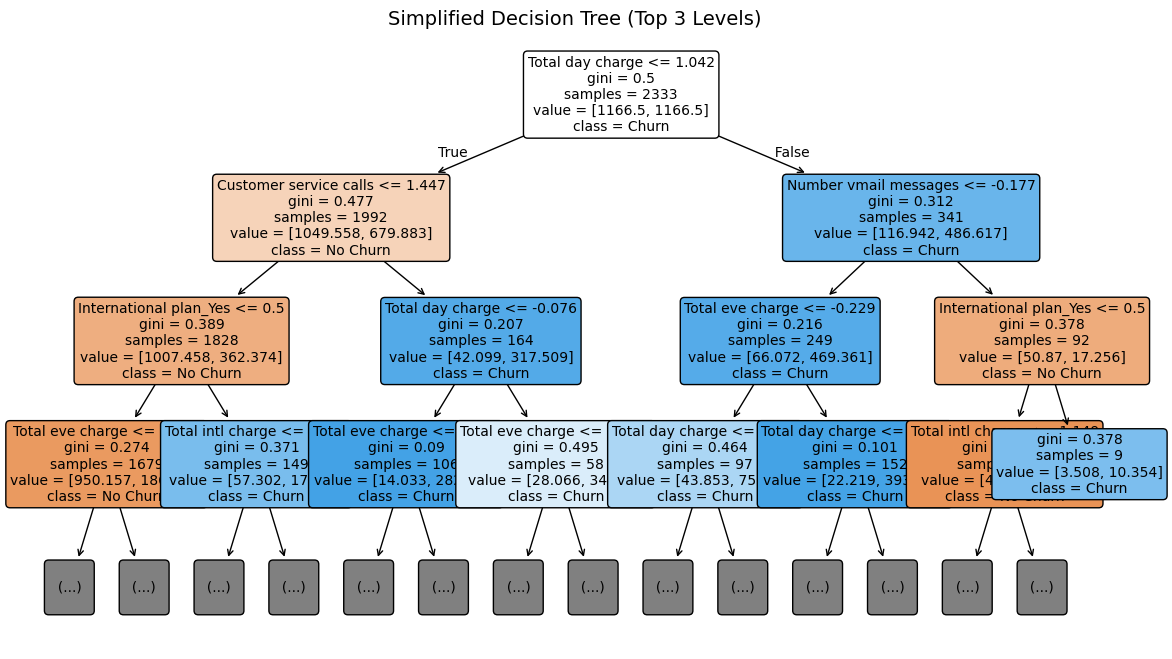

In [29]:
X_train_fs = X_train_scaled[forward_features]
X_test_fs  = X_test_scaled[forward_features]

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 3, 5, 10]
}

grid_dt = GridSearchCV(
    dt,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1
)
grid_dt.fit(X_train_fs, y_train)

print(" Best Parameters (Decision Tree):", grid_dt.best_params_)
print(" Best CV Recall:", grid_dt.best_score_)

#  Evaluate on test data
best_dt = grid_dt.best_estimator_
y_pred_test = best_dt.predict(X_test_fs)
y_prob_test = best_dt.predict_proba(X_test_fs)[:, 1]

print(" Test Classification Report:")
print(classification_report(y_test, y_pred_test))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("ROC-AUC (Test):", roc_auc_score(y_test, y_prob_test))

#  Cross-validation evaluation for multiple metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = cross_validate(best_dt, X_train_fs, y_train, cv=5, scoring=scoring)

for metric in scoring.keys():
    print(f"{metric.capitalize()}: {np.mean(cv_results['test_' + metric]):.4f}")

plt.figure(figsize=(14, 8))
plot_tree(
    best_dt,
    feature_names=forward_features,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Simplified Decision Tree (Top 3 Levels)", fontsize=14)
plt.show()


### Random Forest 

In [30]:
selected_features = forward_features 

X_train_fs = X_train_scaled[selected_features]
X_test_fs  = X_test_scaled[selected_features]

rf = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

#  Grid Search with recall-focused optimization
grid_rf = GridSearchCV(
    rf,
    param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_fs, y_train)

print(" Best Parameters (Random Forest):", grid_rf.best_params_)
print(" Best CV Recall:", grid_rf.best_score_)

#  Evaluate on test data
best_rf = grid_rf.best_estimator_
y_pred_test = best_rf.predict(X_test_fs)
y_prob_test = best_rf.predict_proba(X_test_fs)[:, 1]

print(" Test Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("ROC-AUC (Test):", roc_auc_score(y_test, y_prob_test))

# Cross-validation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results_rf = cross_validate(best_rf, X_train_fs, y_train, cv=5, scoring=scoring)
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {np.mean(cv_results_rf['test_' + metric]):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
 Best Parameters (Random Forest): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
 Best CV Recall: 0.8312115891132572
 Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       855
           1       0.60      0.81      0.69       145

    accuracy                           0.89      1000
   macro avg       0.78      0.86      0.81      1000
weighted avg       0.91      0.89      0.90      1000

Confusion Matrix:
 [[775  80]
 [ 27 118]]
ROC-AUC (Test): 0.895728977616455
Accuracy: 0.9156
Precision: 0.6714
Recall: 0.8312
F1: 0.7420
Roc_auc: 0.9085


## Nested Cross Validation

To improve the reliability of model evaluation and reduce bias introduced during hyperparameter tuning.
Nested cross-validation combines an inner loop (for hyperparameter optimization) and an outer loop (for unbiased performance estimation).
This approach provides a more accurate measure of how the model generalizes to unseen data, especially when multiple tuning steps are applied.

In [31]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Parameter grids
dt_param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Nested CV setup
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Use the built-in 'roc_auc' string instead of custom scorer
scorer = 'recall'

# Decision Tree Nested CV
dt_grid = GridSearchCV(dt, dt_param_grid, cv=inner_cv, scoring=scorer, n_jobs=-1)
dt_nested_scores = cross_val_score(dt_grid, X, y, cv=outer_cv, scoring=scorer, n_jobs=-1)

# Random Forest Nested CV
rf_grid = GridSearchCV(rf, rf_param_grid, cv=inner_cv, scoring=scorer, n_jobs=-1)
rf_nested_scores = cross_val_score(rf_grid, X, y, cv=outer_cv, scoring=scorer, n_jobs=-1)

print(f"Decision Tree Nested CV Recall: {np.mean(dt_nested_scores):.4f} ± {np.std(dt_nested_scores):.4f}")
print(f"Random Forest Nested CV Recall: {np.mean(rf_nested_scores):.4f} ± {np.std(rf_nested_scores):.4f}")



Decision Tree Nested CV Recall: 0.7811 ± 0.0200
Random Forest Nested CV Recall: 0.7666 ± 0.0143


In [32]:
# Define models
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Parameter grids
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5]
}

# Cross-validation setup
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# ---- DECISION TREE ----
dt_grid = GridSearchCV(dt, dt_param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
dt_cv_results = cross_validate(dt_grid, X, y, cv=outer_cv, scoring=scoring, n_jobs=-1)

print("=== Decision Tree Nested Cross-Validation Results ===")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {np.mean(dt_cv_results['test_' + metric]):.4f} ± {np.std(dt_cv_results['test_' + metric]):.4f}")

# ---- RANDOM FOREST ----
rf_grid = GridSearchCV(rf, rf_param_grid, cv=inner_cv, scoring='roc_auc', n_jobs=-1)
rf_cv_results = cross_validate(rf_grid, X, y, cv=outer_cv, scoring=scoring, n_jobs=-1)

print("\n=== Random Forest Nested Cross-Validation Results ===")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {np.mean(rf_cv_results['test_' + metric]):.4f} ± {np.std(rf_cv_results['test_' + metric]):.4f}")


=== Decision Tree Nested Cross-Validation Results ===
Accuracy: 0.8983 ± 0.0236
Precision: 0.6257 ± 0.0729
Recall: 0.7981 ± 0.0397
F1: 0.6981 ± 0.0429
Roc_auc: 0.8894 ± 0.0117

=== Random Forest Nested Cross-Validation Results ===
Accuracy: 0.9484 ± 0.0048
Precision: 0.9050 ± 0.0488
Recall: 0.7229 ± 0.0182
F1: 0.8026 ± 0.0108
Roc_auc: 0.9133 ± 0.0091


--------------------------------------------

## Regularisation through pruning 

In [33]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

# Baseline (unpruned) model
dt_unpruned = DecisionTreeClassifier(class_weight='balanced', random_state=42)
unpruned_results = cross_validate(dt_unpruned, X, y, cv=cv, scoring=scoring, n_jobs=-1)


In [34]:
# Fit initial tree to extract pruning path
path = dt_unpruned.cost_complexity_pruning_path(X, y)
ccp_alphas = path.ccp_alphas[:-1]  # remove the maximum value (prunes all leaves)

# Test different pruning levels
alpha_results = []
for alpha in ccp_alphas:
    dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, ccp_alpha=alpha)
    scores = cross_validate(dt, X, y, cv=cv, scoring=scoring)
    alpha_results.append({
        'alpha': alpha,
        'recall': np.mean(scores['test_recall']),
        'f1': np.mean(scores['test_f1']),
        'roc_auc': np.mean(scores['test_roc_auc']),
        'accuracy': np.mean(scores['test_accuracy'])
    })

alpha_df = pd.DataFrame(alpha_results)
best_alpha = alpha_df.loc[alpha_df['recall'].idxmax(), 'alpha']
print(f"Best alpha (max recall): {best_alpha}")


Best alpha (max recall): 0.00207813713768726


In [35]:
dt_pruned = DecisionTreeClassifier(class_weight='balanced', random_state=42, ccp_alpha=best_alpha)
pruned_results = cross_validate(dt_pruned, X, y, cv=cv, scoring=scoring, n_jobs=-1)

def summarise(name, results):
    print(f"\n=== {name} ===")
    for metric in scoring.keys():
        mean, std = np.mean(results[f'test_{metric}']), np.std(results[f'test_{metric}'])
        print(f"{metric.capitalize()}: {mean:.4f} ± {std:.4f}")

summarise("Unpruned Decision Tree", unpruned_results)
summarise("Pruned Decision Tree", pruned_results)



=== Unpruned Decision Tree ===
Accuracy: 0.9142 ± 0.0078
Precision: 0.7048 ± 0.0417
Recall: 0.7103 ± 0.0527
F1: 0.7054 ± 0.0256
Roc_auc: 0.8296 ± 0.0234

=== Pruned Decision Tree ===
Accuracy: 0.8992 ± 0.0130
Precision: 0.6184 ± 0.0397
Recall: 0.8076 ± 0.0337
F1: 0.6996 ± 0.0305
Roc_auc: 0.8826 ± 0.0161


-------------------------------------------------------------

## SMOTE -Synthetic Minority Oversampling Technique) 

In [36]:
# Apply SMOTE only on training data
sm = SMOTE(random_state=42, sampling_strategy='auto')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_res))

dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 8, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
}

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='recall', n_jobs=-1)
dt_grid.fit(X_train_res, y_train_res)

best_dt = dt_grid.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_proba_dt = best_dt.predict_proba(X_test)[:, 1]

print("\n=== Decision Tree (After SMOTE) ===")
print("Best Params:", dt_grid.best_params_)
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))


rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='recall', n_jobs=-1)
rf_grid.fit(X_train_res, y_train_res)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("\n=== Random Forest (After SMOTE) ===")
print("Best Params:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Best Params': [dt_grid.best_params_, rf_grid.best_params_],
    'AUC': [roc_auc_score(y_test, y_proba_dt), roc_auc_score(y_test, y_proba_rf)],
})
print("\n=== Comparison Summary ===")
print(results)


Before SMOTE: [1995  338]
After SMOTE: [1995 1995]

=== Decision Tree (After SMOTE) ===
Best Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       855
           1       0.55      0.77      0.64       145

    accuracy                           0.88      1000
   macro avg       0.76      0.83      0.78      1000
weighted avg       0.90      0.88      0.88      1000

ROC-AUC: 0.8329905222827183

=== Random Forest (After SMOTE) ===
Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       855
           1       0.73      0.76      0.74       145

    accuracy                           0.92      1000
   macro avg       0.84      0.86      0.85      1000
weighted avg       